In [113]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [98]:
df = pd.read_csv('./DelhiNCR Restaurants.csv')

In [127]:
df.head()

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Website,Address,Phone_No,Latitude,Longitude,Known_For2,Known_For22
0,Rustom's,"Parsi, Street Food, North Indian, Desserts, Be...",2100,"ITO, New Delhi",4.9,1885,4.4,1844,https://www.zomato.com/ncr/rustoms-ito-new-delhi,"Delhi Parsi Anjuman, LNJP Colony, Bahadur Shah...",9.1991E+11,28.638167,77.240472,NaN,NaN
1,Cafe Lota,"Cafe, South Indian, North Indian, Beverages",1200,"Pragati Maidan, New Delhi",4.9,3748,3.9,37,https://www.zomato.com/ncr/cafe-lota-pragati-m...,"National Crafts Museum, Gate 2, Bhairon Marg, ...",9.17839E+11,28.613429,77.242471,"Pondicherry Fish Curry, Coconut Rabdi, Sabudan...","Artistic Decor, The Service, Natural Ambience,..."
2,Dum-Pukht - ITC Maurya,"Mughlai, North Indian, Desserts",5000,"ITC Maurya, Chanakyapuri, New Delhi",4.9,1371,NaN,0,https://www.zomato.com/ncr/dum-pukht-itc-maury...,"ITC Maurya, Chanakyapuri, New Delhi",9.11146E+11,28.598200,77.173661,"Royal ambiance and Mughlai cuisine, also recei...",NaN
3,Burma Burma,"Asian, Burmese, Bubble Tea, Desserts, Salad",1600,"Cyber Hub, DLF Cyber City, Gurgaon",4.9,2636,4.4,1238,https://www.zomato.com/ncr/burma-burma-dlf-cyb...,"Shop 6, Ground Floor, Building 8, Tower C, Cyb...",9.11244E+11,28.494464,77.088532,"Coconut Milk Dessert, Honey Caviar, Kaffir Lim...","Knowledgeable Staff, Authentic, Soothing Ambie..."
4,The Big Chill,"Continental, American, Italian",1500,"Khan Market, New Delhi",4.9,6487,NaN,0,https://www.zomato.com/ncr/the-big-chill-khan-...,"68-A, Khan Market, New Delhi",9.11142E+11,28.600350,77.227493,"Irish Cream Tiramisu, Penne Vodka, Mississippi...","Retro Ambience, Yummy Desserts, Big Portions, ..."


In [79]:
cuisines = df[['Category', 'Dining_Rating']]
cuisines =cuisines.assign(Category=df.Category.str.split(',')).explode('Category').reset_index(drop=True)

In [80]:
cuisines.head(10)

,Category,Dining_Rating
0,Parsi,4.9
1,Street Food,4.9
2,North Indian,4.9
3,Desserts,4.9
4,Beverages,4.9
5,Cafe,4.9
6,South Indian,4.9
7,North Indian,4.9
8,Beverages,4.9
9,Mughlai,4.9


In [81]:
cuisines['Category'] = cuisines['Category'].replace({'North Indian': " North Indian"})

In [82]:
cs = cuisines.groupby('Category', as_index=False)['Dining_Rating'].mean()

In [83]:
cs.sort_values('Dining_Rating',ascending = False)

,Category,Dining_Rating
121,Mangalorean,4.80
145,Spanish,4.70
134,Parsi,4.70
152,Vietnamese,4.65
136,Portuguese,4.60
...,...,...
109,Hyderabadi,3.90
84,Assamese,3.90
138,Raw Meats,3.90
105,Frozen Yogurt,3.90


In [84]:
cuisines.groupby('Category')['Category'].count().sort_values(ascending =False).head()

Category
 North Indian    1063
 Beverages        712
 Chinese          635
 Fast Food        547
 Desserts         393
Name: Category, dtype: int64

In [85]:
categoryWithratings = pd.DataFrame(cuisines.groupby('Category')['Dining_Rating'].mean())

In [86]:
categoryWithratings['num of ratings'] = pd.DataFrame(cuisines.groupby('Category')['Dining_Rating'].count())

In [87]:
categoryWithratings[categoryWithratings['num of ratings'] > 100]

,Dining_Rating,num of ratings
Category,,
Asian,4.206870,131
Beverages,4.174017,712
Chinese,4.120630,635
Continental,4.190939,309
Desserts,4.196183,393
Fast Food,4.111152,547
Italian,4.206936,346
Momos,4.132692,104
Mughlai,4.129819,332


In [88]:
categoryWithratings.groupby('Category')['Dining_Rating'].mean()

Category
 Afghan       4.166667
 American     4.343333
 Andhra       4.266667
 Asian        4.206870
 Awadhi       4.300000
                ...   
Tea           4.000000
Thai          4.271429
Tibetan       4.088889
Turkish       4.400000
Vietnamese    4.650000
Name: Dining_Rating, Length: 153, dtype: float64

In [89]:
categoryWithratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries,  Afghan to Vietnamese
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dining_Rating   153 non-null    float64
 1   num of ratings  153 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.6+ KB


<AxesSubplot:>

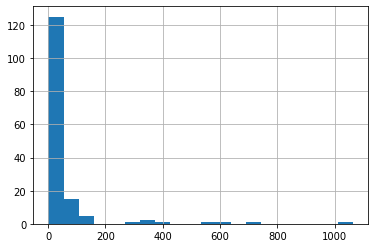

In [90]:
categoryWithratings['num of ratings'].hist(bins = 20)

Text(0.5, 1.0, 'Most popular cuisines of Delhi')

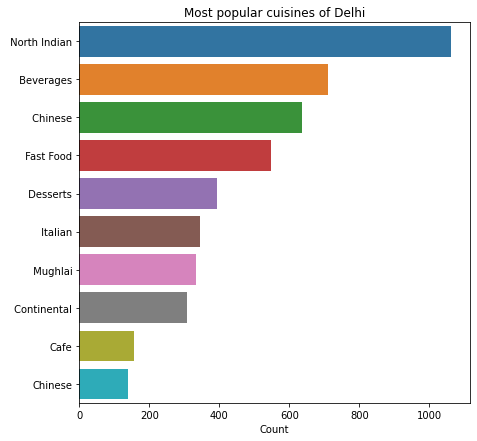

In [91]:
plt.figure(figsize=(7,7))
css=cuisines['Category'].value_counts().sort_values(ascending =False)[:10]
sns.barplot(x  = css,y = css.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Delhi")

Text(0.5, 1.0, 'Most popular cuisines of Delhi by rating')

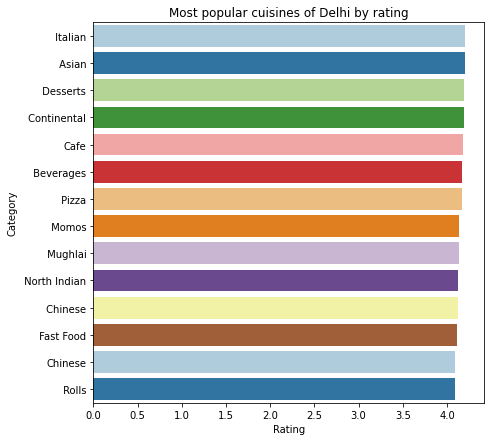

In [92]:
plt.figure(figsize=(7,7))
css2=categoryWithratings[categoryWithratings['num of ratings'] > 100].sort_values('Dining_Rating', ascending = False)

sns.barplot(x  = css2['Dining_Rating'],y = css2.index, palette="Paired")
plt.xlabel('Rating')
plt.title("Most popular cuisines of Delhi by rating")

In [93]:
categoryWithratings[categoryWithratings['num of ratings'] > 100].sort_values('Dining_Rating', ascending = False)

,Dining_Rating,num of ratings
Category,,
Italian,4.206936,346
Asian,4.206870,131
Desserts,4.196183,393
Continental,4.190939,309
Cafe,4.180000,155
Beverages,4.174017,712
Pizza,4.164220,109
Momos,4.132692,104
Mughlai,4.129819,332


In [94]:
css2['Dining_Rating']

Category
 Italian         4.206936
 Asian           4.206870
 Desserts        4.196183
 Continental     4.190939
Cafe             4.180000
 Beverages       4.174017
 Pizza           4.164220
 Momos           4.132692
 Mughlai         4.129819
 North Indian    4.126529
 Chinese         4.120630
 Fast Food       4.111152
Chinese          4.094286
 Rolls           4.088393
Name: Dining_Rating, dtype: float64

In [95]:
df.head()

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Website,Address,Phone_No,Latitude,Longitude,Known_For2,Known_For22
0,Rustom's,"Parsi, Street Food, North Indian, Desserts, Be...",2100,"ITO, New Delhi",4.9,1885,4.4,1844,https://www.zomato.com/ncr/rustoms-ito-new-delhi,"Delhi Parsi Anjuman, LNJP Colony, Bahadur Shah...",9.1991E+11,28.638167,77.240472,NaN,NaN
1,Cafe Lota,"Cafe, South Indian, North Indian, Beverages",1200,"Pragati Maidan, New Delhi",4.9,3748,3.9,37,https://www.zomato.com/ncr/cafe-lota-pragati-m...,"National Crafts Museum, Gate 2, Bhairon Marg, ...",9.17839E+11,28.613429,77.242471,"Pondicherry Fish Curry, Coconut Rabdi, Sabudan...","Artistic Decor, The Service, Natural Ambience,..."
2,Dum-Pukht - ITC Maurya,"Mughlai, North Indian, Desserts",5000,"ITC Maurya, Chanakyapuri, New Delhi",4.9,1371,NaN,0,https://www.zomato.com/ncr/dum-pukht-itc-maury...,"ITC Maurya, Chanakyapuri, New Delhi",9.11146E+11,28.598200,77.173661,"Royal ambiance and Mughlai cuisine, also recei...",NaN
3,Burma Burma,"Asian, Burmese, Bubble Tea, Desserts, Salad",1600,"Cyber Hub, DLF Cyber City, Gurgaon",4.9,2636,4.4,1238,https://www.zomato.com/ncr/burma-burma-dlf-cyb...,"Shop 6, Ground Floor, Building 8, Tower C, Cyb...",9.11244E+11,28.494464,77.088532,"Coconut Milk Dessert, Honey Caviar, Kaffir Lim...","Knowledgeable Staff, Authentic, Soothing Ambie..."
4,The Big Chill,"Continental, American, Italian",1500,"Khan Market, New Delhi",4.9,6487,NaN,0,https://www.zomato.com/ncr/the-big-chill-khan-...,"68-A, Khan Market, New Delhi",9.11142E+11,28.600350,77.227493,"Irish Cream Tiramisu, Penne Vodka, Mississippi...","Retro Ambience, Yummy Desserts, Big Portions, ..."


In [107]:
onlineRating = df[['Delivery_Rating', 'Dining_Rating']]
onlineRating

,Delivery_Rating,Dining_Rating
0,4.4,4.9
1,3.9,4.9
2,NaN,4.9
3,4.4,4.9
4,NaN,4.9
...,...,...
1960,4.1,3.9
1961,NaN,3.9
1962,3.9,3.9
1963,3.8,3.9


In [124]:
onlineRating['has_online'] = onlineRating['Delivery_Rating'].apply(lambda x: "Yes" if not pd.isnull(x) else "No")

<ipython-input-124-26891ab6f713>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlineRating['has_online'] = onlineRating['Delivery_Rating'].apply(lambda x: "Yes" if not pd.isnull(x) else "No")


In [125]:
onlineRating

,Delivery_Rating,Dining_Rating,has_online
0,4.4,4.9,Yes
1,3.9,4.9,Yes
2,NaN,4.9,No
3,4.4,4.9,Yes
4,NaN,4.9,No
...,...,...,...
1960,4.1,3.9,Yes
1961,NaN,3.9,No
1962,3.9,3.9,Yes
1963,3.8,3.9,Yes


<AxesSubplot:xlabel='has_online', ylabel='Dining_Rating'>

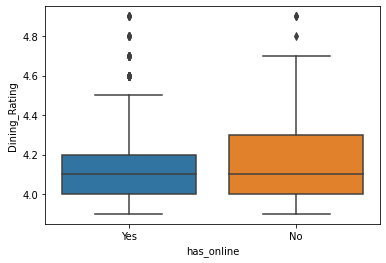

In [126]:
sns.boxplot(x='has_online', y='Dining_Rating', data=onlineRating)